# Batch GDA
## Predicting Minimum Temperature
This notebook is the first in a 3 part series of GDA (or gradient descent algorithms), and contains the code for basic Batch Gradient Descent Algorithm from scratch. The algorithm has been used to train the Linear Regression Model on the Weather data present with a simple hypothesis function $h(\theta)=X\cdot\theta$.

Note: This notebook can be read as a standalone and is not connected to other parts in anyway.

The important required libraries are first imported.

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

Using pandas library, the file is imported into the notebook and a sample is printed to see the columns and their names.

In [22]:
df = pd.read_csv("Summary of Weather.csv")
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA
0,10001,01/07/1942,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78,72,75.0
1,10001,02/07/1942,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84,71,78.0
2,10001,03/07/1942,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79,72,76.0
3,10001,04/07/1942,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80,72,76.0
4,10001,05/07/1942,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80,71,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118536,82506,27/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,27,0,NaN,NaN,83,65,74.0
118537,82506,28/12/1945,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,12,28,0.39,NaN,NaN,85,65,75.0
118538,82506,29/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,12,29,0,NaN,NaN,83,65,74.0
118539,82506,30/12/1945,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,12,30,0,NaN,NaN,83,65,74.0


The data shown was already analyzed and cleaned before starting this notebook. A linear relationship was observed between Maximum and Minimum Temperatures as expected. Hence these 2 columns are used, with Maximum temperature as an independent variable and Minimum temperature as a dependent variable.

In [28]:
X = np.asarray(df.MAX.values)
y = np.asarray(df.MIN.values)

Now, a column of 1s is used added in the matrix of X to account for the y-intercepts in the hypothesis. It should be noted that the data is not broken into train and test datasets, since it was not in the scope of the task that was required to be done.

In [29]:
m = len(y)
X = np.vstack((np.ones(m), X.T)).T

In [24]:
X

array([[ 1., 78.],
       [ 1., 84.],
       [ 1., 79.],
       ...,
       [ 1., 83.],
       [ 1., 83.],
       [ 1., 85.]])

Using plot library for the scatter plot, to visualize the data, although it was already visualized on Excel. It is possible to normalize this data, however this is a simple problem and is not of necessity here.

Text(0, 0.5, 'MIN')

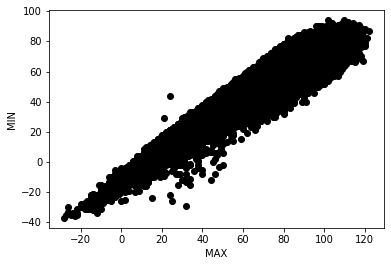

In [25]:
plt.scatter(X[:,[1]], y,  color='black') 
plt.xlabel("MAX")
plt.ylabel("MIN")

Selecting random values of theta to plot the line and see it is an example on the plot.

Text(0, 0.5, 'MIN')

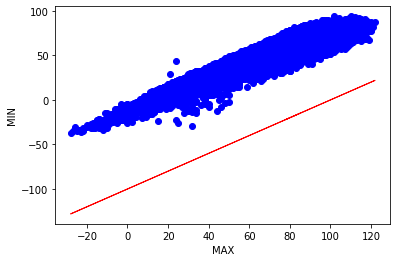

In [30]:
theta_0 = -100.0
theta_1 = 1.0

# the vector theta is initialized with theta_0 and theta_1
theta = np.asarray([theta_0,theta_1]).astype(float)

# Plot the data
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=1)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

The Mean Squared Error (MSE) cost function is defined below. Then the cost is calculated for the random theta values that were chosen above.

In [37]:
def CostFunction(X, y, theta):
  
    m = len(y) 
    J = 0 
    h = np.sum(np.multiply(X, theta), axis=1)
    
    # Calculate the Squared Error = (h - y)^2 (vectorized)
    SquaredError = np.power(np.subtract(h,y), 2)
    
    # Calculate the Cost J
    J = 1/(2*m) * np.sum(SquaredError)
    
    return J

In [9]:
CostFunction(X,y,theta)

3494.216806843202

Generating random values of theta, the cost is calculated for them. This allows for choosing the starting point with the smallest cost, so the number of iterations can be minimized.

In [10]:
import random # import the random library 

print ("[Th0 Th1]", "\tJ") # write an header

for x in range(10):
    theta_0 = random.randint(1,101)
    theta_1 = random.randint(1,101)   
    theta = np.asarray([theta_0, theta_1]).astype(float)
    # Calculate J and print the table
    print (theta, CostFunction(X, y, theta))

[Th0 Th1] 	J
[23. 26.] 2201723.9859036114
[64.  8.] 215471.60462202952
[48. 24.] 1917530.0563644648
[45. 33.] 3635795.0832032803
[15. 23.] 1699239.9946685114
[60. 35.] 4135877.3927544057
[49.  2.] 10936.253810917742
[30. 88.] 26002830.001396142
[51. 86.] 24974345.499135323
[27. 97.] 31599368.425810482


Now, the most important algorithm, Gradient Descent is defined below, taking in all the necessary arguments.

In [72]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = len(y)
    for i in range(num_iters):
        
        # Calculate h = X * theta (vectorized)
        h = np.sum(np.multiply(X,theta), axis=1) 
        # Calculate the error = (h - y) (vectorized)
        error = np.subtract(h, y)
        # Calculate the new theta (vectorized)
        theta_new = alpha * 1/m * np.sum(np.multiply(X.T, error), axis=1)
        # Update theta
        theta = np.subtract(theta, theta_new)
    
    cost = CostFunction(X,y,theta)
        
    return theta, cost

Running the gradient descent with initial values -20 and 5, and for $100,000$ interations. Different values of the hyperparameter, alpha or the learning rate were set, but $0.0002$ was found to be the highest at which the values converged.
Note, to obtain the output shown, the function of gradient descent was modified to print out the values of theta after every 5000 values


In [62]:
theta = np.asarray([-20,5]).astype(float)
# Set the number of iterations for the Gradient Descent
iterations = 100000

# Set the Learning Rate
alpha = 0.0002

# Run the gradientDescent() function, and collect the output
theta, cost = gradientDescent(X, y, theta, alpha, iterations)

[-20.06414934  -0.37985778]
[-19.55367926   1.0288638 ]
[-19.07593292   1.02315825]
[-18.61350841   1.01763568]
[-18.16591434   1.01229023]
[-17.73267508   1.00711621]
[-17.31333025   1.00210812]
[-16.90743426   0.99726065]
[-16.51455578   0.99256865]
[-16.13427733   0.98802712]
[-15.7661948    0.98363125]
[-15.40991707   0.97937635]
[-15.06506554   0.97525791]
[-14.73127376   0.97127156]
[-14.40818704   0.96741305]
[-14.09546204   0.96367829]
[-13.79276646   0.96006331]
[-13.49977865   0.95656426]
[-13.21618727   0.95317743]
[-12.94169096   0.94989922]


Plotting the new value of theta after gradient descent.

Text(0, 0.5, 'MIN')

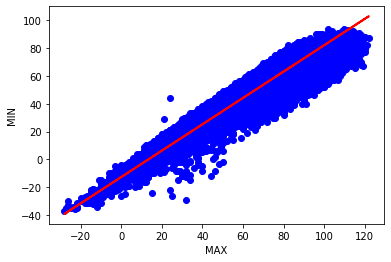

In [63]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [64]:
print(theta,cost)

[-12.67605031   0.94672677] 25.8640454436016


From the graph, it can be seen that the line lies on the scatter plot. Also the cost function has been minimized compared to before. However, from the trend of the changing theta and the graph, it might be possible to reduce it further, so now gradient descent will be done for a second time, again for a $100,000$ iterations at the same learning rate.

In [69]:
new_theta = theta
iterations = 100000
alpha = 0.0002
new_theta, cost = gradientDescent(X, y, new_theta, alpha, iterations)

[-12.67599804   0.94672615]
[-12.41882616   0.94365483]
[-12.16990206   0.94068202]
[-11.92896122   0.93780456]
[-11.6957476    0.93501937]
[-11.47001339   0.93232351]
[-11.25151872   0.92971411]
[-11.04003139   0.92718839]
[-10.83532669   0.92474367]
[-10.63718708   0.92237737]
[-10.44540202   0.92008695]
[-10.25976771   0.91786998]
[-10.08008688   0.91572412]
[-9.90616861  0.91364708]
[-9.73782808  0.91163665]
[-9.5748864   0.90969069]
[-9.41717044  0.90780715]
[-9.26451259  0.90598401]
[-9.11675065  0.90421934]
[-8.97372758  0.90251127]


Text(0, 0.5, 'MIN')

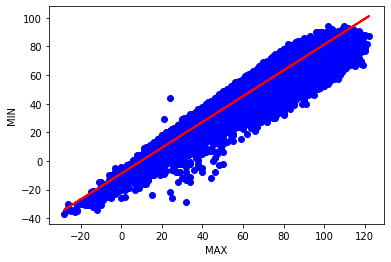

In [70]:
plt.scatter(X[:,[1]], y,  color='blue') 

# Plot a red line corrensponding to the Hypothesis model.
plt.plot(X[:,[1]], np.sum(np.multiply(X,new_theta), axis=1), color='red', linewidth=2)

# Put labels
plt.xlabel("MAX")
plt.ylabel("MIN")

In [71]:
print(new_theta,cost)

[-8.83531865  0.9008583 ] 25.10043835689585


It can be seen that the values of theta kept decreasing, however judging from the line and the cost before and after these extra $100,000$ iterations, the change is minimal. So these extra iterations were not much of use and were an extra computation cost that wasted resources and time. In more complex models, this might have led to overfitting of the data.

# Conclusion
Any value of theta can be used, before or after the iteration and it can be said that the batch GDA works for simple linear regression models.